In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('C:/Users/levin/Desktop/loan/loan.csv')

C:\Users\levin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

## Break down loan status

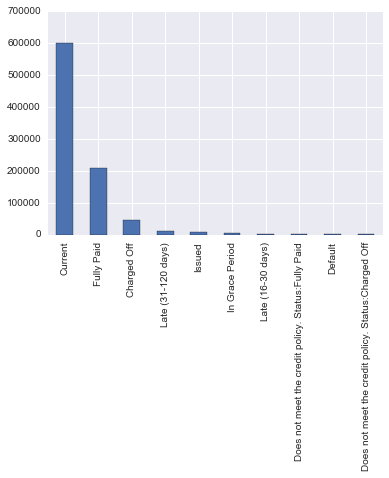

In [3]:
df['loan_status'].value_counts().plot(kind='bar')

## Looking at the loan status _'Fully paid', 'Default', 'Charged Off'_ for classifer

In [4]:
loans = df[(df['loan_status']=='Fully Paid')|(df['loan_status']=='Charged Off')|(df['loan_status']=='Default')]

In [5]:
def is_fully_paid(row):
    if row['loan_status']  == 'Fully Paid':
        return 1
    else:
        return 0
loans['new_status'] = loans.apply(lambda x: is_fully_paid(x), axis=1)
loans['new_status'].value_counts()

C:\Users\levin\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1    207723
0     46467
Name: new_status, dtype: int64

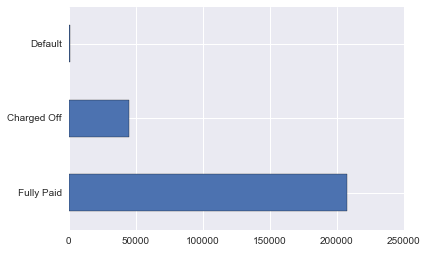

In [6]:
loans['loan_status'].value_counts().plot(kind='barh')

## Loans dataset summary statistics

In [7]:
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,new_status
count,2.541900e+05,2.541900e+05,254190.000000,254190.000000,254190.000000,254190.000000,254190.000000,2.541900e+05,254190.000000,254190.000000,...,126.000000,144.000000,144.000000,144.000000,144.000000,1.904640e+05,144.000000,144.000000,144.000000,254190.000000
mean,1.234067e+07,1.366169e+07,13570.590897,13530.210374,13437.613928,13.776014,418.273195,7.251051e+04,16.560534,0.250533,...,73.657937,1.673611,3.555556,5517.340278,58.945139,2.969485e+04,1.256944,2.097222,2.625000,0.817196
std,1.479726e+07,1.576494e+07,8133.386869,8111.020870,8129.476448,4.404088,244.912615,5.878545e+04,7.794390,0.742390,...,23.074812,1.629406,2.932284,4507.604776,20.356957,2.949980e+04,1.792551,3.903234,4.057067,0.386507
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.900000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,1.462514e+06,1.709671e+06,7250.000000,7200.000000,7200.000000,10.740000,239.560000,4.500000e+04,10.770000,0.000000,...,63.350000,0.000000,2.000000,2091.250000,46.825000,1.330000e+04,0.000000,0.000000,1.000000,1.000000
50%,6.321818e+06,7.660992e+06,12000.000000,12000.000000,11975.000000,13.530000,365.230000,6.200000e+04,16.220000,0.000000,...,77.050000,1.000000,3.000000,4511.500000,61.950000,2.230000e+04,1.000000,0.000000,2.000000,1.000000
75%,1.655208e+07,1.858534e+07,18250.000000,18125.000000,18000.000000,16.550000,547.550000,8.700000e+04,22.010000,0.000000,...,88.250000,2.000000,5.000000,8212.750000,74.225000,3.680000e+04,1.000000,2.000000,4.000000,1.000000
max,6.860466e+07,7.350742e+07,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,57.140000,29.000000,...,129.200000,8.000000,21.000000,22279.000000,102.800000,2.013133e+06,9.000000,21.000000,19.000000,1.000000


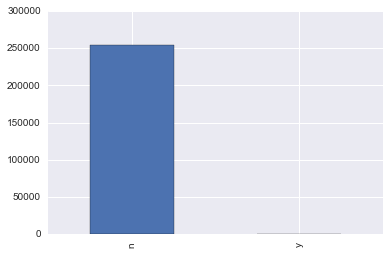

In [8]:
loans['pymnt_plan'].value_counts().plot(kind='bar')

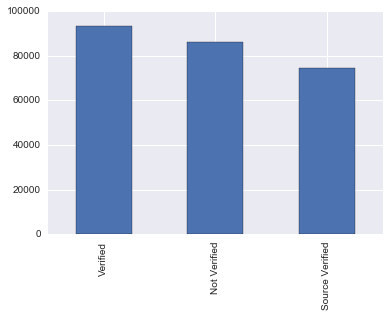

In [9]:
loans['verification_status'].value_counts().plot(kind='bar')

In [10]:
pivt_by_grade = pd.pivot_table(loans,values='id', index=['grade'],columns=['loan_status'], aggfunc=len)

## Plot loan status by grade

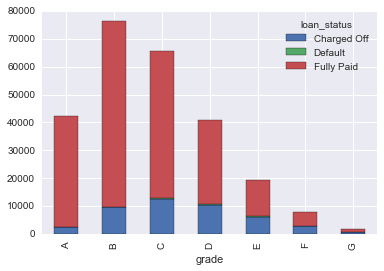

In [11]:
pivt_by_grade.plot(kind='bar',stacked = True)

In [12]:
import datetime as dt
loans['year'] = pd.to_datetime(loans['issue_d']).dt.year
loans['year'].value_counts()

C:\Users\levin\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


2013    71414
2014    69307
2012    49591
2015    26144
2011    19683
2010    11522
2009     4716
2008     1562
2007      251
Name: year, dtype: int64

## Plot loan status by year

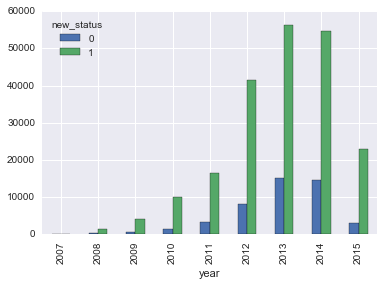

In [13]:
pivt_by_year = pd.pivot_table(loans,values='id',index=['year'],columns=['new_status'],aggfunc=len)
pivt_by_year.plot(kind='bar')

## Explore different features in dataset

In [14]:
pd.pivot_table(loans,values='delinq_2yrs',index=['new_status'],aggfunc=np.mean)

new_status
0    0.278757
1    0.244219
Name: delinq_2yrs, dtype: float64

In [15]:
loans['initial_list_status'].value_counts()

f    182747
w     71443
Name: initial_list_status, dtype: int64

In [16]:
pd.pivot_table(loans,values='collections_12_mths_ex_med',index=['new_status'],aggfunc=np.mean)

new_status
0    0.008287
1    0.006433
Name: collections_12_mths_ex_med, dtype: float64

In [17]:
loans['collections_12_mths_ex_med'].value_counts()

0.0    252541
1.0      1484
2.0        97
3.0         8
4.0         2
6.0         1
5.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [18]:
pd.pivot_table(loans,values='mths_since_last_major_derog',index=['new_status'],aggfunc=np.mean)

new_status
0    42.666703
1    43.566188
Name: mths_since_last_major_derog, dtype: float64

In [19]:
loans['policy_code'].value_counts()

1.0    254190
Name: policy_code, dtype: int64

In [20]:
loans['application_type'].value_counts()

INDIVIDUAL    254189
JOINT              1
Name: application_type, dtype: int64

In [21]:
loans['grade'].value_counts()

B    76263
C    65680
A    42343
D    40818
E    19387
F     7739
G     1960
Name: grade, dtype: int64

In [22]:
loans['sub_grade'].value_counts()

B3    18106
B4    16992
C1    15023
B2    14654
C2    14419
B5    14386
C3    12854
C4    12126
B1    12125
A5    12016
C5    11258
A4    11069
D1    10109
D2     9125
D3     8042
D4     7454
A3     7180
A2     6208
D5     6088
A1     5870
E1     4753
E2     4584
E3     3844
E4     3357
E5     2849
F1     2253
F2     1757
F3     1560
F4     1201
F5      968
G1      694
G2      503
G3      336
G4      236
G5      191
Name: sub_grade, dtype: int64

## Plot term by loan status

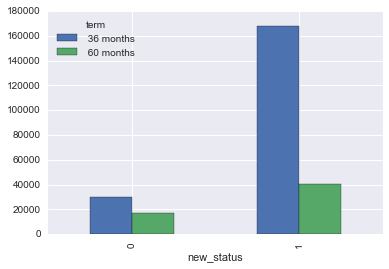

In [23]:
pivt_by_term = pd.pivot_table(loans,values='id',index='new_status',columns=['term'],aggfunc=len)
pivt_by_term.plot(kind='bar')

## Plot verification_status by loan status

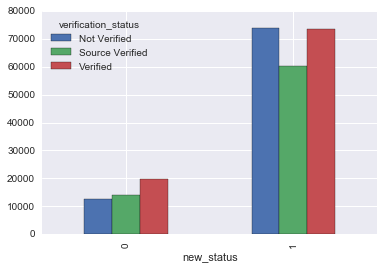

In [24]:
pivt_by_verif = pd.pivot_table(loans,values='id',index='new_status',columns=['verification_status'],aggfunc=len)
pivt_by_verif.plot(kind='bar')

## Plot grade by loan status

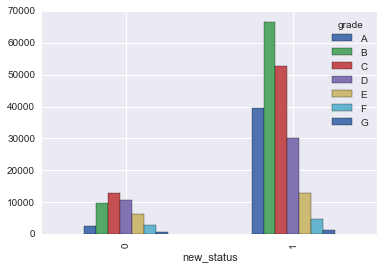

In [25]:
pivt_by_g = pd.pivot_table(loans,values='id',index='new_status',columns=['grade'],aggfunc=len)
pivt_by_g.plot(kind='bar')

## Plot home_ownership by loan status

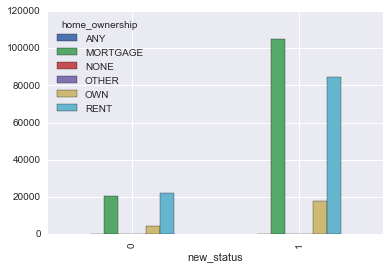

In [26]:
pivt_by_h = pd.pivot_table(loans,values='id',index='new_status',columns=['home_ownership'],aggfunc=len)
pivt_by_h.plot(kind='bar')

## Distribution of loan amount by loan status

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC9EC29748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001BC9FD02C88>], dtype=object)

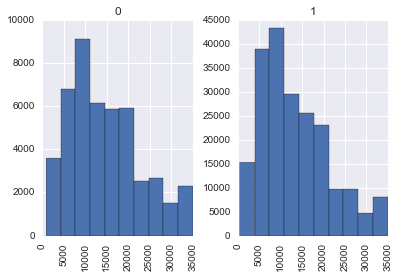

In [27]:
loans['loan_amnt'].hist(by=loans['new_status'])

## Distribution of fund amount by loan status

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC9FDA38D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001BC9FEE8CF8>], dtype=object)

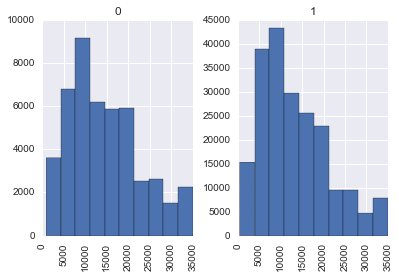

In [29]:
loans['funded_amnt'].hist(by=loans['new_status'])

## Distribution of interest rate by loan status

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC9FF6FA58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA0005198>], dtype=object)

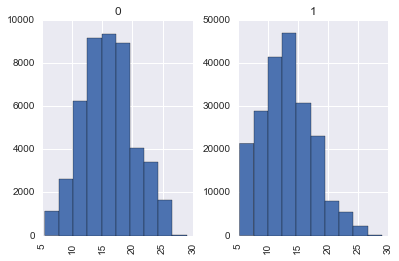

In [30]:
loans['int_rate'].hist(by=loans['new_status'])

## Distribution of installment by loan status

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC9FFC9080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA0142BE0>], dtype=object)

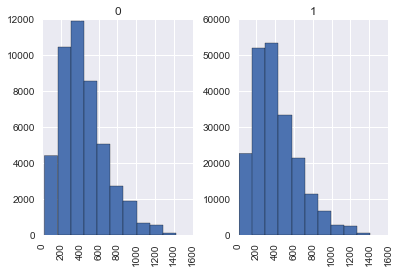

In [31]:
loans['installment'].hist(by=loans['new_status'])

## Distribution of total recieved principle by loan status

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA0104BA8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA0BA8780>], dtype=object)

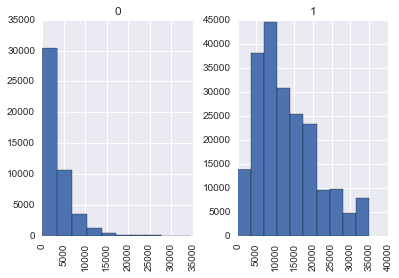

In [32]:
loans['total_rec_prncp'].hist(by=loans['new_status'])

## Look into the numeric feature importance scores
   For categorical variables will need to turn into dummy variables or preprocess by LabelEncoder

In [35]:
features = ['loan_amnt','funded_amnt','int_rate','installment','annual_inc','delinq_2yrs','inq_last_6mths','open_acc',
            'pub_rec','revol_bal','total_acc','out_prncp','total_pymnt','total_rec_prncp',
            'total_rec_int','total_rec_late_fee','acc_now_delinq']

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators = 150, random_state = 1)
etc.fit(loans[features],loans['new_status'])


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [37]:
imp_scores = [round(x,4) for x in etc.feature_importances_]
importances = zip(imp_scores,features)
sort = sorted(importances,reverse=True)

## Plot the feature importance scores from high to low

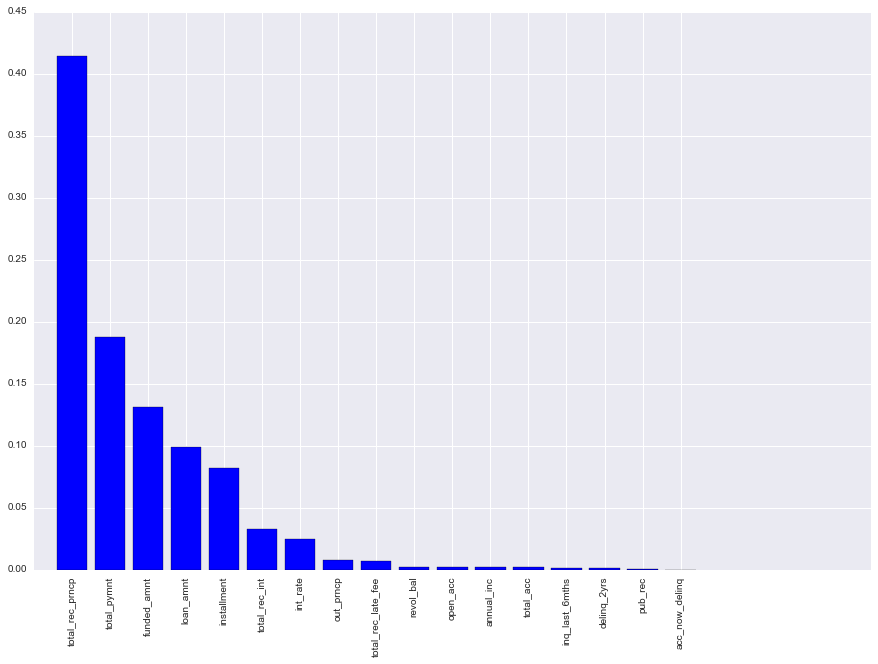

In [39]:
y= [row[0] for row in sort]
x= [row[1] for row in sort]
plt.figure(figsize=(15,10))
plt.bar(range(len(sort)),y,align='center',color='b')
plt.xticks(range(len(sort)),x,rotation = 90)
plt.xlim(-1,21)
plt.show()

## Plot mean of total received principle by loan status (Highest importance score)

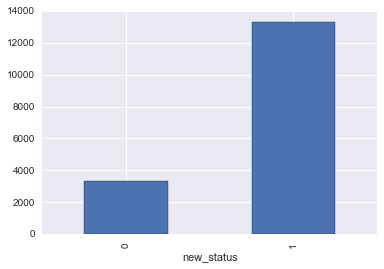

In [40]:
import numpy as np
pvt_by_recpr = pd.pivot_table(loans,values='total_rec_prncp',index='new_status',aggfunc=np.mean)
pvt_by_recpr.plot(kind='bar')